# Linear regression using LASSO

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import normalize

from utils import get_dataframe

Load data:

In [48]:
df = get_dataframe(solar_noon_altitudes=True)

X = df.drop(["RSKF", "Datum und Uhrzeit", "Gesamtanlage[kWh]"], axis=1) # TODO: Use RSKF
columns = X.columns
X_norm, norms = normalize(X, axis=0, return_norm=True) # Normalize features to get an idea about their importance.
y = df["Gesamtanlage[kWh]"]

Train linear regression model:

In [51]:
alpha = 2.5e-3 # Regularization factor
reg = Lasso(alpha).fit(X_norm, y)

coefficients = pd.concat([pd.DataFrame(columns),pd.DataFrame(np.transpose(reg.coef_))], axis=1)
print(coefficients)

reg.coef_ = reg.coef_ / norms # Now reg can be applied on unnormalized data.

print("Regularization factor: ", alpha)
print("R^2: ", reg.score(X,y))

                       0           0
0                     FX    0.000000
1                     FM    0.000000
2                    RSK  -21.855272
3                    SDK  405.342524
4                SHK_TAG    0.000000
5                     NM   -3.176883
6                    VPM    0.000000
7                     PM   -0.000000
8                    TMK   38.690464
9                    UPM   -8.773032
10                   TXK    0.000000
11                   TNK    0.000000
12                   TGK    0.000000
13  Solar noon altitudes  758.058842
Regularization factor:  0.0025
R^2:  0.924185444318673


c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [53]:
#print(reg.coef_)

Plotting:

In [ ]:
# Code taken from exploratory_analysis.ipynb and adapted:

In [54]:
from datetime import datetime

data = get_dataframe(solar_noon_altitudes=True)
# remove whitespace at beginning of column name
data.columns = [col.strip() for col in data.columns]
data.head()


# drop 29.02.2020 because there is no value in the other years to compare
data = data.drop(data[data["Datum und Uhrzeit"] == "29.02.2020"].index).reset_index()
data = data.drop("index", axis=1)

# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data = data.drop("Date", axis=1)

c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Leo\Documents\Studium\Master\Semester 3\Data Literacy\Project\Code\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


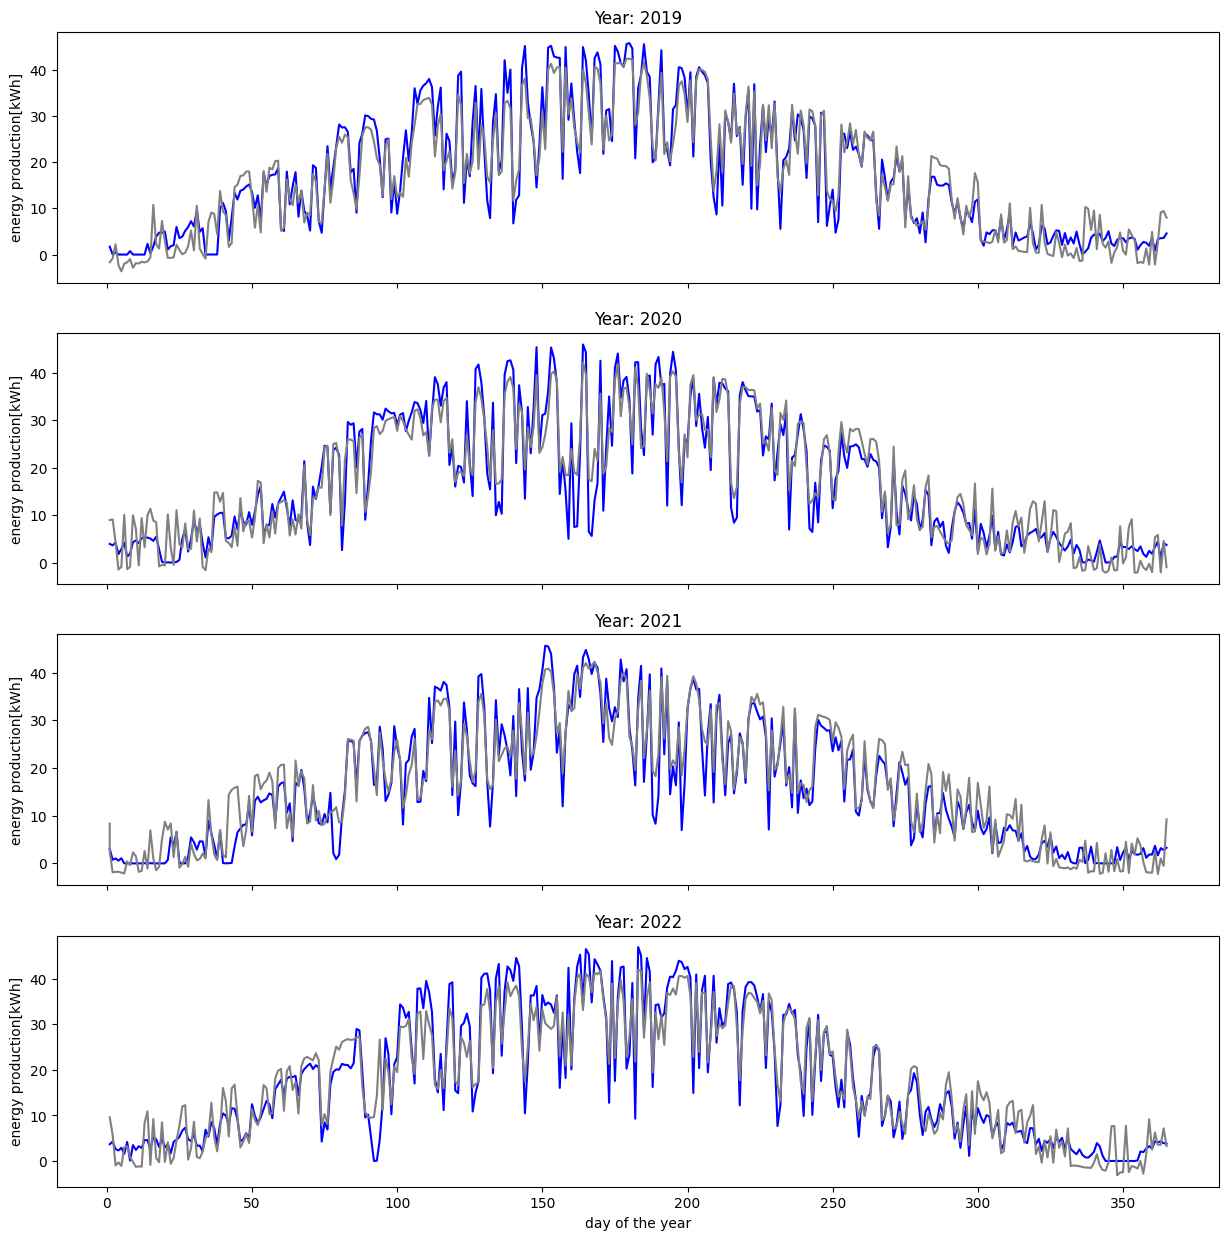

In [56]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    X = year_data.drop(["RSKF", "Datum und Uhrzeit", "Year", "Day of year", "Month", "Gesamtanlage[kWh]"], axis=1)

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )

    #plot predictions
    ax.plot(
        year_data["Day of year"],
        reg.predict(X),
        color="grey"
    )
    
    
    ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[3].set_xlabel("day of the year")
plt.show()